In [ ]:
# Buils and Evaluate Models 
# *********** CREDIT ONE DATA *************

In [ ]:
# Selecting and Dividing the Data

# This task is centered around a regression problem using the CreditOne data, 
# but the final models will be built for a classification problem

In [8]:
# Imports
import pandas as pd
import numpy as np
import math 
from math import sqrt
import scipy
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn

#Estimators 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Cross Validation
from sklearn.model_selection import train_test_split

In [9]:
# Import pre-processed and cleaned data
creditv3 = pd.read_csv (r'C:\Users\Milena\Documents\Big Data\Caso 15 - Import and Prepare the Data\creditv3.csv', header =0)


In [10]:
creditv3

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_ABR,PAY_STATUS_MAY,PAY_STATUS_JUN,PAY_STATUS_JUL,...,BILL_AMT_JUL,BILL_AMT_AGO,BILL_AMT_SET,PAY_AMT_ABR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AGO,PAY_AMT_SET,default payment next month
0,1,20000,Female,University,Married,24,-2,-2,-1,-1,...,689,3102,3913,0,0,0,0,689,0,Default
1,2,120000,Female,University,Single,26,2,0,0,0,...,2682,1725,2682,2000,0,1000,1000,1000,0,Default
2,3,90000,Female,University,Single,34,0,0,0,0,...,13559,14027,29239,5000,1000,1000,1000,1500,1518,No Default
3,4,50000,Female,University,Married,37,0,0,0,0,...,49291,48233,46990,1000,1069,1100,1200,2019,2000,No Default
4,5,50000,Male,University,Married,57,0,0,0,-1,...,35835,5670,8617,679,689,9000,10000,36681,2000,No Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,High School,Married,39,0,0,0,0,...,208365,192815,188948,1000,5000,3047,5003,20000,8500,No Default
29996,29997,150000,Male,High School,Single,43,0,0,-1,-1,...,3502,1828,1683,0,0,129,8998,3526,1837,No Default
29997,29998,30000,Male,University,Single,37,0,0,-1,2,...,2758,3356,3565,3100,2000,4200,22000,0,0,Default
29998,29999,80000,Male,High School,Married,41,-1,0,0,0,...,76304,78379,-1645,1804,52964,1926,1178,3409,85900,Default


In [11]:
creditv3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null object
EDUCATION                     29655 non-null object
MARRIAGE                      30000 non-null object
AGE                           30000 non-null int64
PAY_STATUS_ABR                30000 non-null int64
PAY_STATUS_MAY                30000 non-null int64
PAY_STATUS_JUN                30000 non-null int64
PAY_STATUS_JUL                30000 non-null int64
PAY_STATUS_AGO                30000 non-null int64
PAY_STATUS_SEP                30000 non-null int64
BILL_AMT_ABR                  30000 non-null int64
BILL_AMT_MAY                  30000 non-null int64
BILL_AMT_JUN                  30000 non-null int64
BILL_AMT_JUL                  30000 non-null int64
BILL_AMT_AGO                  30000 non-null int64
BILL_AMT_SET         

In [ ]:
# Selecting Data

In [12]:
# Select the features

# Features
features = creditv3.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT_ABR,BILL_AMT_MAY,BILL_AMT_JUN,BILL_AMT_JUL,BILL_AMT_AGO,BILL_AMT_SET,PAY_AMT_ABR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AGO
0,0,0,0,689,3102,3913,0,0,0,0,689
1,3261,3455,3272,2682,1725,2682,2000,0,1000,1000,1000
2,15549,14948,14331,13559,14027,29239,5000,1000,1000,1000,1500
3,29547,28959,28314,49291,48233,46990,1000,1069,1100,1200,2019
4,19131,19146,20940,35835,5670,8617,679,689,9000,10000,36681


In [13]:
# Select the Dependent Variable 

# dependent variable
depVar = creditv3['PAY_AMT_SET']

In [20]:
# Establish the training set for the X-variables 

#Training Set (Feature Space: X Training)
X_train = (features[: 21000])
X_train.head()

,BILL_AMT_ABR,BILL_AMT_MAY,BILL_AMT_JUN,BILL_AMT_JUL,BILL_AMT_AGO,BILL_AMT_SET,PAY_AMT_ABR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AGO
0,0,0,0,689,3102,3913,0,0,0,0,689
1,3261,3455,3272,2682,1725,2682,2000,0,1000,1000,1000
2,15549,14948,14331,13559,14027,29239,5000,1000,1000,1000,1500
3,29547,28959,28314,49291,48233,46990,1000,1069,1100,1200,2019
4,19131,19146,20940,35835,5670,8617,679,689,9000,10000,36681


In [21]:
# Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)

#Dependent Variable Training Set (y Training)
y_train = depVar[: 21000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 21000


0       0
1       0
2    1518
3    2000
4    2000
Name: PAY_AMT_SET, dtype: int64

In [23]:
# Establish the testing set for the X-Variables 

#Testing Set (X Testing)
X_test = features[-9000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 9000
       BILL_AMT_ABR  BILL_AMT_MAY  BILL_AMT_JUN  BILL_AMT_JUL  BILL_AMT_AGO  \
21000             0           780          1170             0           780   
21001        192023        189029        191291        188411        184848   
21002         15797         14117         23186         21557        118109   
21003             0             0             0         81890        162743   
21004         72928         74448         67352         67253         65301   

       BILL_AMT_SET  PAY_AMT_ABR  PAY_AMT_MAY  PAY_AMT_JUN  PAY_AMT_JUL  \
21000             0            0            0            0         1170   
21001        178220         7600         6974         6738         8000   
21002        128602         4522         4078         2011         5055   
21003        160106            0            0            0            0   
21004         79237         5000            0        10000         2500   

       PAY_

In [24]:
# Training Data is divided into two parts: X-train and y_train
# Testing data follows the same rules and contains two sets: X_test and y_test (ground truth)

# Establish Ground truth 

#Ground Truth (y_test) 
y_test = depVar[-9000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 9000


21000      780
21001    10000
21002     3203
21003     7600
21004     3000
Name: PAY_AMT_SET, dtype: int64

In [25]:
# Cross Validate

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((15750, 11), (5250, 11))

In [26]:
# # Building the Models and Choosing the Right Model

# 1. Imports (already done above)
# 2. Models (Establish variables that will be use for defining each model)
# Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [27]:
# 3. It is a good idea to establish a variable specifically for your features
# so you will have full control over what is being used for training
# Features (already done above)
features = creditv3.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT_ABR,BILL_AMT_MAY,BILL_AMT_JUN,BILL_AMT_JUL,BILL_AMT_AGO,BILL_AMT_SET,PAY_AMT_ABR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AGO
0,0,0,0,689,3102,3913,0,0,0,0,689
1,3261,3455,3272,2682,1725,2682,2000,0,1000,1000,1000
2,15549,14948,14331,13559,14027,29239,5000,1000,1000,1000,1500
3,29547,28959,28314,49291,48233,46990,1000,1069,1100,1200,2019
4,19131,19146,20940,35835,5670,8617,679,689,9000,10000,36681


In [28]:
# 4. Not mandatory, but it might be a good idea to validate that the correct column is being used for the dependent variable
# dependent variable
print(depVar)

0            0
1            0
2         1518
3         2000
4         2000
         ...  
29995     8500
29996     1837
29997        0
29998    85900
29999     2078
Name: PAY_AMT_SET, Length: 30000, dtype: int64


In [29]:
# 5. Use the model variables (established in step 2)
model.fit(X_train,y_train)

NameError: name 'model' is not defined

In [30]:
# 6. Random Forest

modelRF.fit(X_train,y_train)

C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [31]:
# 7. Support Vector Regression

modelSVR.fit(X_train,y_train)

C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
# 8. Linear Regression

modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# Choosing the Right Model (Cross Validation Score)

print(cross_val_score(modelRF, X_train, y_train)) 

#These values correspond to the the following:

# 1st value: The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
# 2nd value: The time for fitting the estimator on the train set for each cv split.
# 3rd Value: The time for scoring the estimator on the test set for each cv split. 

C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.64195059 0.6191574  0.65578276]


In [37]:
print(cross_val_score(modelSVR, X_train, y_train)) 

C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'a

[-0.05889042 -0.04443833 -0.05512161]


In [38]:
print(cross_val_score(modelLR, X_train, y_train)) 

[0.34562203 0.40837974 0.31736333]


C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
# Cross Validation Score
# modelRF: [ 0.64195059  0.6191574   0.65578276] BEST MODEL
# modelSVR [-0.05889042 -0.04443833 -0.05512161]
# modelLR  [ 0.34562203  0.40837974  0.31736333]

In [41]:
# Model Fitting Random Forest
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.60423209 0.62396463 0.64201223]


0.9195774615575522

In [77]:
#Make Predictions Random Forest
predictions = modelRF.predict(X_test)

In [78]:
# Evaluate Results Random Forest
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.553
RMSE: 10031.618


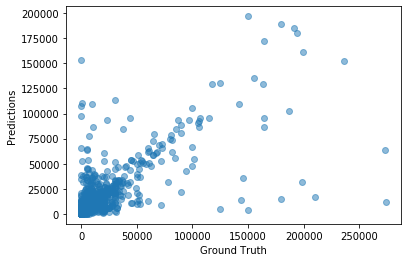

In [61]:
# Plotting the Results (Plot a comparison between the known values in the test set and the predictions made by the model)

plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

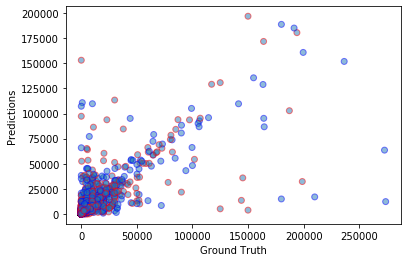

In [62]:
# Changed color argument by edgecolor
 
plt.scatter(y_test, predictions, edgecolors=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

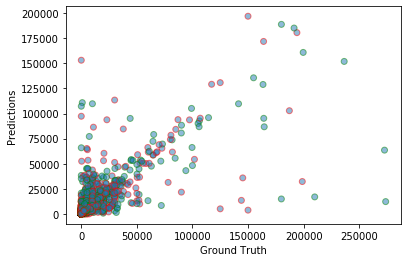

In [63]:
plt.scatter(y_test, predictions, edgecolors =['green','red'],  alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

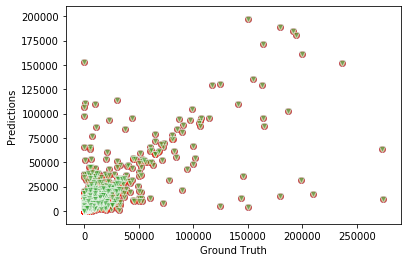

In [64]:
plt.scatter(y_test, predictions, alpha = 0.5)

plt.scatter(y_test,predictions, edgecolor = 'red' , marker = "o",  alpha = 0.5)
plt.scatter(y_test,predictions, edgecolor = 'white' , marker = "v", alpha = 0.5)

plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [65]:
#Make Predictions for Linear Regression

predictions = modelLR.predict(X_test)

# Evaluating the Results 

predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.243
RMSE: 13063.481


In [66]:
predictions = modelLR.predict(X_test)

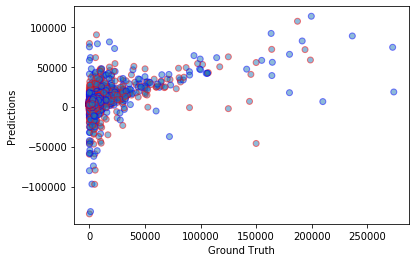

In [67]:
plt.scatter(y_test, predictions, edgecolors=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

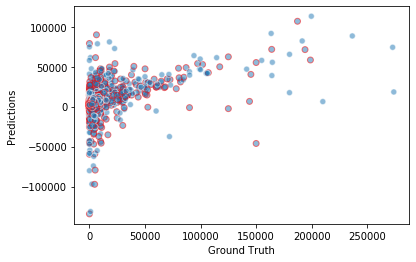

In [68]:
plt.scatter(y_test, predictions, edgecolors =['white','red'],  alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

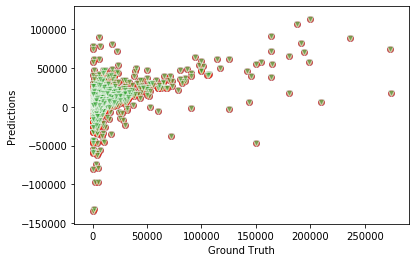

In [69]:
plt.scatter(y_test, predictions, alpha = 0.5)

plt.scatter(y_test,predictions, edgecolor = 'red' , marker = "o",  alpha = 0.5)
plt.scatter(y_test,predictions, edgecolor = 'white' , marker = "v", alpha = 0.5)

plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [71]:
#Make Predictions for Linear Regression

predictions = modelSVR.predict(X_test)

# Evaluating the Results 

predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.051
RMSE: 15386.661


In [72]:
predictions = modelSVR.predict(X_test)

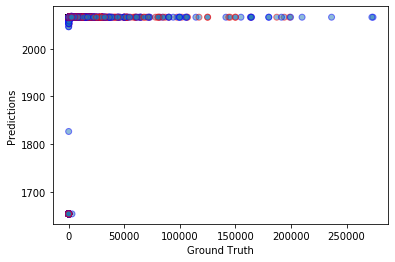

In [74]:
plt.scatter(y_test, predictions, edgecolors=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

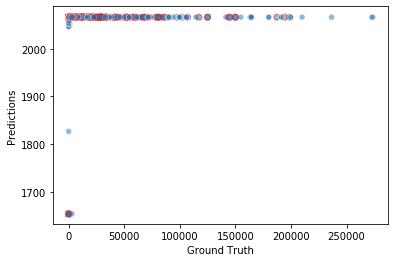

In [75]:
plt.scatter(y_test, predictions, edgecolors =['white','red'],  alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [112]:
creditv3

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_ABR,PAY_STATUS_MAY,PAY_STATUS_JUN,PAY_STATUS_JUL,...,BILL_AMT_JUL,BILL_AMT_AGO,BILL_AMT_SET,PAY_AMT_ABR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AGO,PAY_AMT_SET,default payment next month
0,1,20000,Female,University,Married,24,-2,-2,-1,-1,...,689,3102,3913,0,0,0,0,689,0,Default
1,2,120000,Female,University,Single,26,2,0,0,0,...,2682,1725,2682,2000,0,1000,1000,1000,0,Default
2,3,90000,Female,University,Single,34,0,0,0,0,...,13559,14027,29239,5000,1000,1000,1000,1500,1518,No Default
3,4,50000,Female,University,Married,37,0,0,0,0,...,49291,48233,46990,1000,1069,1100,1200,2019,2000,No Default
4,5,50000,Male,University,Married,57,0,0,0,-1,...,35835,5670,8617,679,689,9000,10000,36681,2000,No Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,High School,Married,39,0,0,0,0,...,208365,192815,188948,1000,5000,3047,5003,20000,8500,No Default
29996,29997,150000,Male,High School,Single,43,0,0,-1,-1,...,3502,1828,1683,0,0,129,8998,3526,1837,No Default
29997,29998,30000,Male,University,Single,37,0,0,-1,2,...,2758,3356,3565,3100,2000,4200,22000,0,0,Default
29998,29999,80000,Male,High School,Married,41,-1,0,0,0,...,76304,78379,-1645,1804,52964,1926,1178,3409,85900,Default


In [ ]:
# Feature Engineering 

In [ ]:
# PCA feature engineering

In [108]:
from sklearn.decomposition import PCA 
from sklearn import preprocessing 

In [119]:
featuresPCA = creditv3.iloc[:,6:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT_ABR,BILL_AMT_MAY,BILL_AMT_JUN,BILL_AMT_JUL,BILL_AMT_AGO,BILL_AMT_SET,PAY_AMT_ABR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AGO
0,0,0,0,689,3102,3913,0,0,0,0,689
1,3261,3455,3272,2682,1725,2682,2000,0,1000,1000,1000
2,15549,14948,14331,13559,14027,29239,5000,1000,1000,1000,1500
3,29547,28959,28314,49291,48233,46990,1000,1069,1100,1200,2019
4,19131,19146,20940,35835,5670,8617,679,689,9000,10000,36681


In [150]:
# Before we do PCS we need to center and scale the data
# predictions = modelRF.predict(X_test)


scaled_data = preprocessing.scale(featuresPCA.T) # T as inm transpose, this because we need data in rows not columns

In [151]:
pca = PCA() # PCA in a data set, not in a machine learning setting 
pca.fit(scaled_data) # Calculate loading scores and the variation each principal component accounts for 
pca_data= pca.transform(scaled_data) # Generated coordinates for a PCA graph based on loading scores and the scaled data 

In [152]:
# draw a graph
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1) # calculate the percentage of variation
                                                                     # that each principal component accounts for 
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] # Create labels for scree plot

In [157]:
per_var

array([62.1,  9.5,  6.4,  5.3,  4.2,  3.7,  3.6,  2.8,  0.8,  0.7,  0.5,
        0.4,  0. ,  0. ,  0. ,  0. ,  0. ])

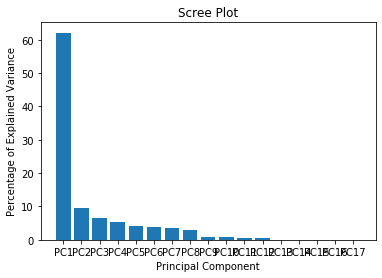

In [154]:
plt.bar(x=range(1,len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# Almost all of the variation is along the first PC (principal component), 
# so PC1 to PC2 should do a good job representing the original data 

In [134]:
pca_df = pd.DataFrame(pca_data, index=[featuresPCA], columns=labels)

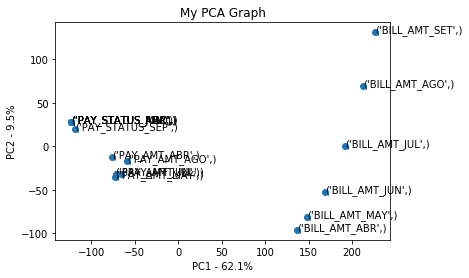

In [136]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

In [ ]:
# The Pay Status clustered on the left side, suggesting that they are correlated with each other
# The Bill Amount clustered on the Right side, suggesting that they are correlated with each other
# The separation of the 2 clusters along the x-axis suggest that the samples are very different to each other

In [162]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier[(random_state = 1)
    n_estimators = (20, 100, 300, 500, 800, 1200)
max_depth = (5, 8, 15, 16, 25, 30, 32)
min_samples_split = (2, 5, 10, 15, 100)
min_samples_leaf = (1, 2, 5, 10)]

hyperF = dict(n_estimators = n_estimators, 
              max_depth = max_depth, 
              min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, c = 3, verbose = 1, n_jobs = -1)
gridF = gridF.fit (features_train, depVar_train)

print(gridF.best_params_)

SyntaxError: invalid syntax (<ipython-input-162-bd2adf2c4f46>, line 3)